# dataset link 
# https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# import & preprocessing dataset

In [2]:
# Load dataset
csv_path = 'Data/heart.csv'
target_column = 'target'
data = pd.read_csv(csv_path)
print(f"Total Samples: {len(data)}") 
print(f"Dataset Preview:") 
print(data.head())

Total Samples: 1025
Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
categorical_columns = ['cp', 'restecg', 'slope', 'thal']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


imputer = SimpleImputer(strategy='median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=categorical_columns)

# Scale numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Separate features and target
features = data.drop(columns=[target_column])
target = data[target_column].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display dataset information after preprocessing
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")
print("Preprocessing Complete")
print(f"Number of features: {features.shape[1]}")

Training Samples: 820
Testing Samples: 205
Preprocessing Complete
Number of features: 23


Logistic Regression Accuracy: 81.95


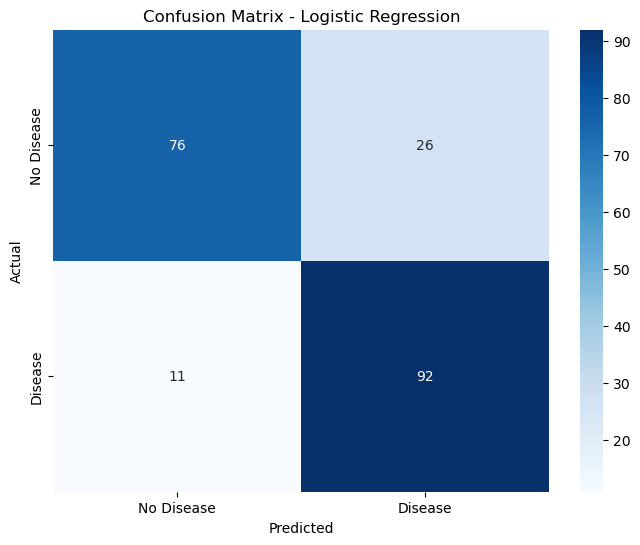

In [4]:
# Train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logreg_model.fit(X_train, y_train)

# Test the Logistic Regression model
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)*100
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Decision Tree Accuracy: 97.07


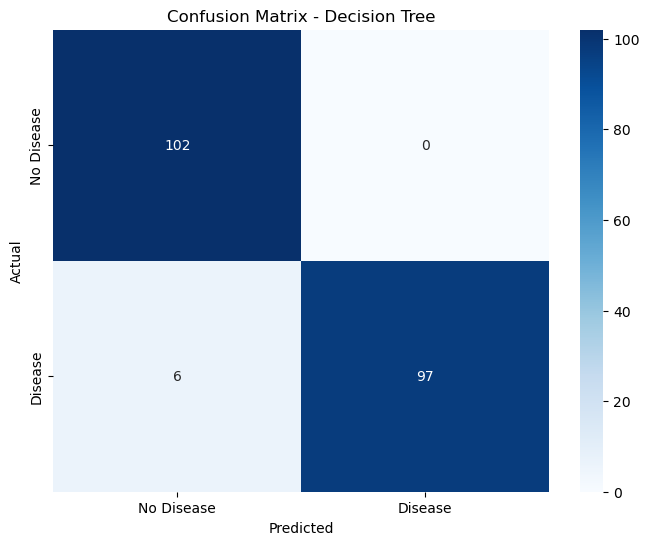

In [5]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Test the model and predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)*100
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


# visualization

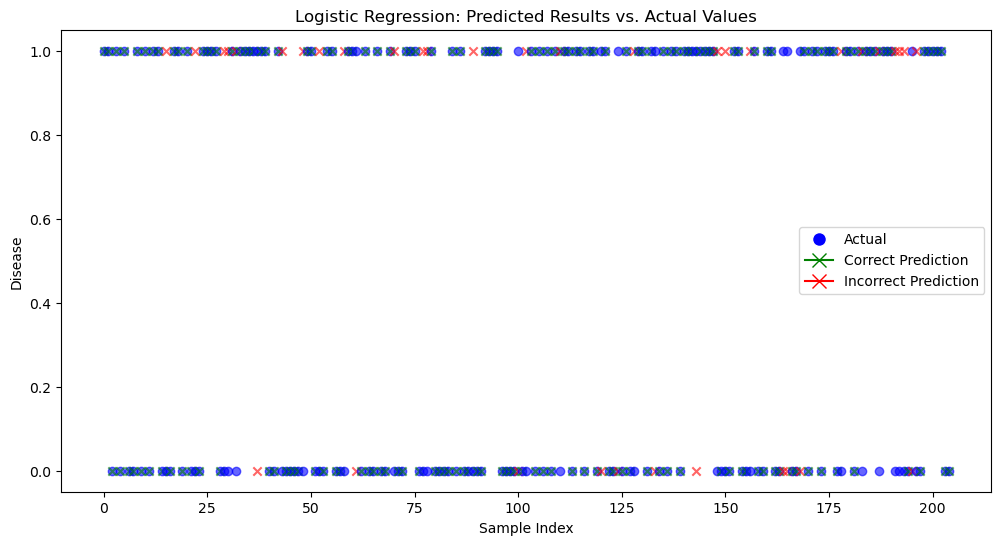

In [6]:
# Visualize the dataset after performing the Logistic Regression model
plt.figure(figsize=(12, 6))
for i in range(len(y_test)):
    if y_test[i] == y_pred_logreg[i]:
        plt.scatter(i, y_test[i], color='blue', alpha=0.6)  
        plt.scatter(i, y_pred_logreg[i], color='green', alpha=0.6, marker='x')  
    else:
        plt.scatter(i, y_test[i], color='blue', alpha=0.6)  
        plt.scatter(i, y_pred_logreg[i], color='red', alpha=0.6, marker='x')  


actual_handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Actual')
correct_handle = plt.Line2D([0], [0], marker='x', color='green', markersize=10, label='Correct Prediction')
incorrect_handle = plt.Line2D([0], [0], marker='x', color='red', markersize=10, label='Incorrect Prediction')

plt.xlabel('Sample Index')
plt.ylabel('Disease')
plt.title('Logistic Regression: Predicted Results vs. Actual Values')
plt.legend(handles=[actual_handle, correct_handle, incorrect_handle])
plt.show()


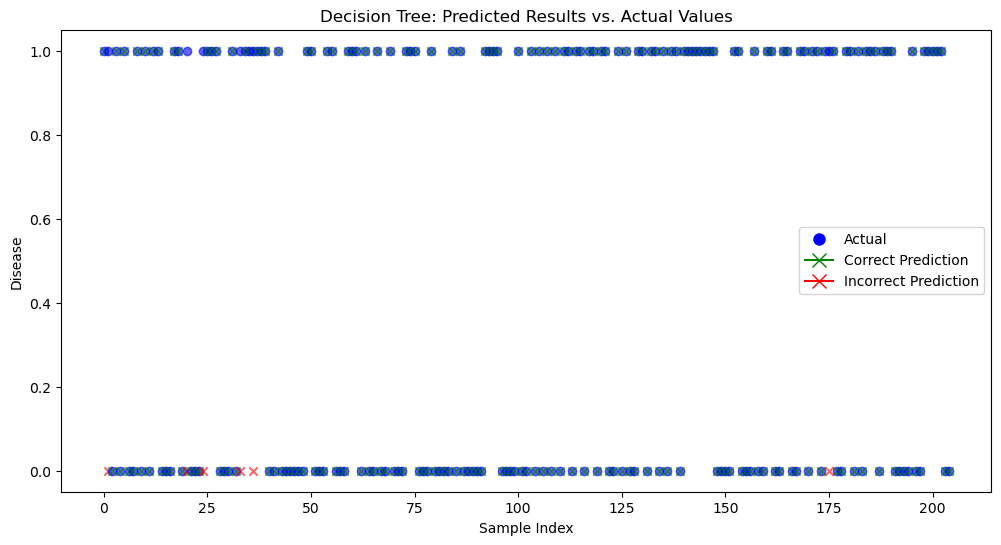

In [7]:
# Visualize the dataset after performing the Decision Tree model
plt.figure(figsize=(12, 6))
for i in range(len(y_test)):
    if y_test[i] == y_pred_dt[i]:
        plt.scatter(i, y_test[i], color='blue', alpha=0.6)  
        plt.scatter(i, y_pred_dt[i], color='green', alpha=0.6, marker='x')  
    else:
        plt.scatter(i, y_test[i], color='blue', alpha=0.6)  
        plt.scatter(i, y_pred_dt[i], color='red', alpha=0.6, marker='x')  


actual_handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Actual')
correct_handle = plt.Line2D([0], [0], marker='x', color='green', markersize=10, label='Correct Prediction')
incorrect_handle = plt.Line2D([0], [0], marker='x', color='red', markersize=10, label='Incorrect Prediction')

plt.xlabel('Sample Index')
plt.ylabel('Disease')
plt.title('Decision Tree: Predicted Results vs. Actual Values')
plt.legend(handles=[actual_handle, correct_handle, incorrect_handle])
plt.show()


# compare the two models 

Logistic Regression Accuracy: 81.95
Decision Tree Accuracy: 97.07
Decision Tree has higher accuracy.


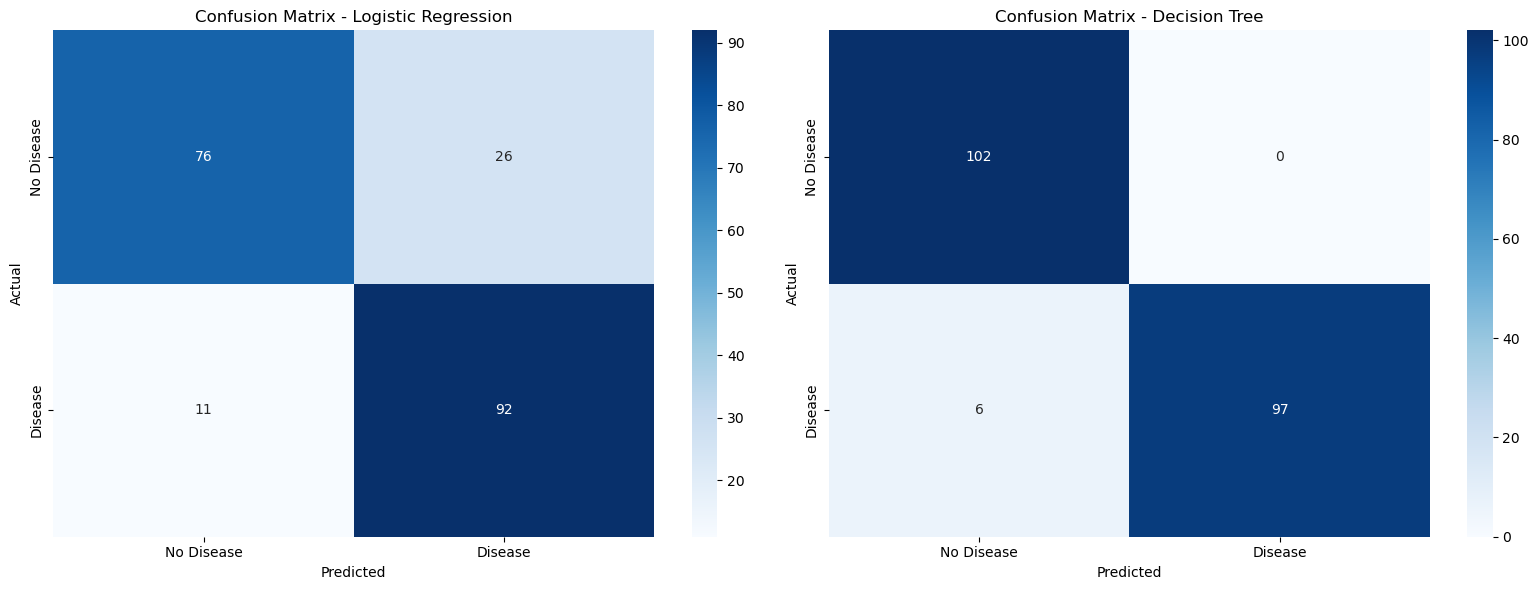

In [8]:
# Compare model accuracies
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

if accuracy_logreg > accuracy_dt:
    print("Logistic Regression has higher accuracy.")
else:
    print("Decision Tree has higher accuracy.")

# Plot both confusion matrices for comparison
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix - Logistic Regression
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], ax=ax[0])
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted')
ax[0].set_title('Confusion Matrix - Logistic Regression')

# Confusion Matrix - Decision Tree
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], ax=ax[1])
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted')
ax[1].set_title('Confusion Matrix - Decision Tree')

plt.tight_layout()
plt.show()

# predict new output

In [9]:
# Select a few random samples from the test set for prediction
num_samples = 2
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
new_data_points = X_test.iloc[random_indices]
true_values = y_test[random_indices]

# Predict using the Logistic Regression model
predicted_values_logreg = logreg_model.predict(new_data_points)

# Predict using the Decision Tree model
predicted_values_dt = dt_model.predict(new_data_points)

# Print the results 
for i, idx in enumerate(random_indices):
    print(f"Sample {i + 1}:")
    print(f"  Index: {idx}")
    print(f"  True Value: {true_values[i]}")
    print(f"  Logistic Regression Predicted Value: {predicted_values_logreg[i]}")
    print(f"  Decision Tree Predicted Value: {predicted_values_dt[i]}")
    print()


Sample 1:
  Index: 49
  True Value: 1
  Logistic Regression Predicted Value: 1
  Decision Tree Predicted Value: 1

Sample 2:
  Index: 74
  True Value: 1
  Logistic Regression Predicted Value: 1
  Decision Tree Predicted Value: 1

